# AutoEncoders

## What are AutoEncoders?
* A simple neural network, similar to a multi-layer perceptron model
* It reproduces its input at the output layer i.e. the number of output layers will be the same as the input layers
* What the hidden layers are really doing is: calculating combinations of the original features therefore representing the original data in a reduced dimensional space
* The center hidden layer reduced the dimensionality to learn the most important combinations of original features
* They reduce dimensionality and remove noise

Illustration:

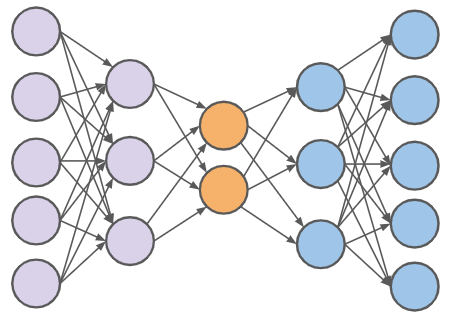

# AutoEncoder for Dimensionality Reduction
We can perform dimensionality reduction by separating it into 2 parts:
1. Encoder: Takes a highly dimensional object and encodes it into a lower dimensional space
2. Decoder: It expands back to make sure that the hidden layer is learning correctly
* For dimensionality reduction we only take the encoder part

Illustration: 

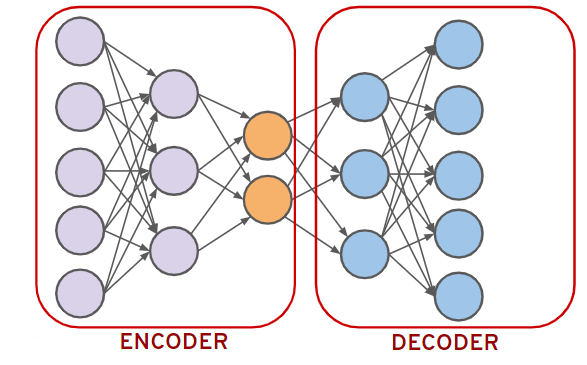


## What are the use cases of Dimensionality Reduction?
* Compress data
* Visualize data in lower dimensions
* Reveal hidden relationships unseen in higher dimensions

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

To create a dataset

In [258]:
from sklearn.datasets import make_blobs

In [259]:
data = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0, random_state=101)

In [260]:
X, y = data

In [261]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [262]:
feat = pd.DataFrame(X)

In [263]:
feat = pd.concat([feat, z_noise], axis=1)

In [264]:
feat.columns = ['X1', 'X2', 'X3']

In [265]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


In [266]:
#This will create a 3D figure:

In [267]:
from mpl_toolkits.mplot3d import Axes3D

In [268]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>

In [269]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [270]:
#Now let's import stocastic gradient descent

In [271]:
from tensorflow.keras.optimizers import SGD

In [272]:
# 3 --> 2 --> 3

In [273]:
encoder = Sequential()
encoder.add(Dense(2, activation='relu', input_shape=[3]))

In [274]:
decoder = Sequential()
decoder.add(Dense(3, activation='relu', input_shape=[2]))

In [275]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer=SGD(lr=1.5))

In [276]:
# Now we need to scale the data

In [277]:
from sklearn.preprocessing import MinMaxScaler

In [278]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [279]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 3ms/step - loss: 0.2032
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 0.2287
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 0.2442
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2402
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2447


In [280]:
encoded_2dim = encoder.predict(scaled_data)

In [281]:
encoded_2dim.shape

(300, 2)

In [282]:
scaled_data.shape

(300, 3)